# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [5]:
N = 30
xdata = np.linspace(-5, 5, N)
dy = 2
ydata = a_true*xdata**2 + b_true*xdata + c_true + np.random.normal(0.0, dy, size = N)

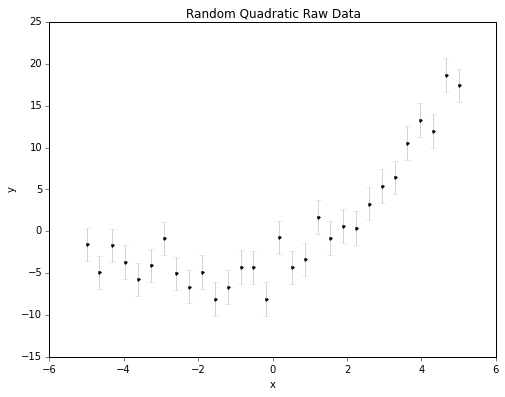

In [16]:
plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata, dy, fmt='.k', ecolor='lightgray')
plt.tick_params(axis='x', direction='out', top='off')
plt.tick_params(axis='y', direction='out', right='off')
plt.xlabel('x'), plt.ylabel('y'), plt.title('Random Quadratic Raw Data');

In [7]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [8]:
def model(x, a, b, c):
    return a*x**2+b*x+c

In [9]:
theta_best, theta_cov = opt.curve_fit(model, xdata, ydata, sigma=dy)

In [10]:
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))

a = 0.516 +/- 0.045
b = 1.923 +/- 0.119
c = -4.253 +/- 0.532


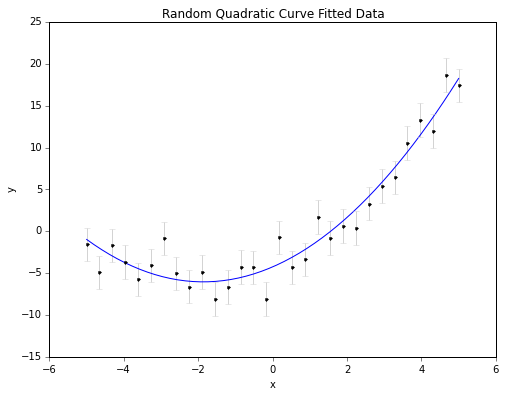

In [15]:
xfit = np.linspace(-5.0,5.0)
yfit = theta_best[0]*xfit**2 + theta_best[1]*xfit + theta_best[2]

plt.figure(figsize=(8,6))
plt.plot(xfit, yfit)
plt.errorbar(xdata, ydata, dy, fmt='.k', ecolor='lightgray')
plt.xlabel('x'), plt.ylabel('y'), plt.title('Random Quadratic Curve Fitted Data')
plt.tick_params(axis='x', direction='out', top='off')
plt.tick_params(axis='y', direction='out', right='off')

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors